 # Run OLS and RF models
  1. Is a good a idea consider the variables with more correlation. 
  2. I add all the variables beacuse I don't have enough knowledge of the variables. 
  3. The code is ajusted to run the model with the variable that you want (applies for RF).

## First, run a lineal model of the variables


In [1]:
import pandas as pd
import statsmodels.api as sm
from openpyxl import Workbook
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os

# Leer los DataFrames
data_frame_combinado_indep = pd.read_csv('../DataIntermediate/combined_data_indep_variables.csv', sep=',').dropna()
data_frame_combinado_dep = pd.read_csv('../DataIntermediate/combined_data_dep_variables.csv', sep=',').dropna()

# Verificar las columnas de cada DataFrame
print("Variables Independientes:\n", data_frame_combinado_indep.columns)
print("Variables Dependientes:\n", data_frame_combinado_dep.columns)

Variables Independientes:
 Index(['id', 'OutDeg_Var.Expl_RedConfliAguaTot',
       'Indeg_Var.Expl_RedConfliAguaTot',
       'Out2local_Var.Expl_RedConfliAguaTot',
       'In2local_Var.Expl_RedConfliAguaTot',
       'OutBetaCent_Var.Expl_RedConfliAguaTot',
       'InBetaCent_Var.Expl_RedConfliAguaTot',
       'Out2Step_Var.Expl_RedConfliAguaTot',
       'In2Step_Var.Expl_RedConfliAguaTot', 'OutARD_Var.Expl_RedConfliAguaTot',
       ...
       'Out2Step_Var.Explic_RedeEmprestParcel',
       'In2Step_Var.Explic_RedeEmprestParcel',
       'OutARD_Var.Explic_RedeEmprestParcel',
       'InARD_Var.Explic_RedeEmprestParcel',
       'OutClose_Var.Explic_RedeEmprestParcel',
       'InClose_Var.Explic_RedeEmprestParcel',
       'Between_Var.Explic_RedeEmprestParcel',
       '2StepBet_Var.Explic_RedeEmprestParcel',
       'Frag_Var.Explic_RedeEmprestParcel',
       'DwFrag_Var.Explic_RedeEmprestParcel'],
      dtype='object', length=203)
Variables Dependientes:
 Index(['id', 'Degree_Rede_Entreaju

In [2]:
data_frame_combinado_dep.head()

,id,Degree_Rede_EntreajudaLabur,BetaCent_Rede_EntreajudaLabur,2Step_Rede_EntreajudaLabur,ARD_Rede_EntreajudaLabur,Closeness_Rede_EntreajudaLabur,Eigenvector_Rede_EntreajudaLabur,Between_Rede_EntreajudaLabur,2StepBet_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,...,OutARD_Var.Dep_RedePartilhaAgu,InARD_Var.Dep_RedePartilhaAgu,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Between_Var.Dep_RedePartilhaAgu,2StepBet_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu,Ha_Total_Superf_NumZonas,N_Zonas_Superf_NumZonas
0,Aiace Quior,7,0.016946,7,7,251,0.000000,0,0,-0.000401,...,1.5,0.0,511,516,0,0,0.000050,0.000029,2.3644,7
1,Alamada Bia,2,0.003419,2,2,256,0.000000,0,0,-0.001006,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,0.5087,1
2,Alanghate Mfumba,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,1.4640,4
3,Albat Calabus,10,0.032262,10,10,248,0.000000,0,0,-0.000037,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,1.5186,2
4,Americano Mbunde,19,29.068657,19,19,239,0.223607,0,0,0.001053,...,0.0,0.0,516,516,0,0,-0.000071,-0.000061,0.2500,1


In [3]:
data_frame_combinado_indep.head(130)

,id,OutDeg_Var.Expl_RedConfliAguaTot,Indeg_Var.Expl_RedConfliAguaTot,Out2local_Var.Expl_RedConfliAguaTot,In2local_Var.Expl_RedConfliAguaTot,OutBetaCent_Var.Expl_RedConfliAguaTot,InBetaCent_Var.Expl_RedConfliAguaTot,Out2Step_Var.Expl_RedConfliAguaTot,In2Step_Var.Expl_RedConfliAguaTot,OutARD_Var.Expl_RedConfliAguaTot,...,Out2Step_Var.Explic_RedeEmprestParcel,In2Step_Var.Explic_RedeEmprestParcel,OutARD_Var.Explic_RedeEmprestParcel,InARD_Var.Explic_RedeEmprestParcel,OutClose_Var.Explic_RedeEmprestParcel,InClose_Var.Explic_RedeEmprestParcel,Between_Var.Explic_RedeEmprestParcel,2StepBet_Var.Explic_RedeEmprestParcel,Frag_Var.Explic_RedeEmprestParcel,DwFrag_Var.Explic_RedeEmprestParcel
0,Aiace Quior,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
1,Alamada Bia,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
2,Alanghate Mfumba,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
3,Albat Calabus,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
4,Americano Mbunde,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,Vieira Bedugle,3,3,3,3,45.033321,43.878429,3,3,3.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
126,Viriato Quintunda,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,2,0.0,2.0,516,510,0,0,0.000083,0.000085
127,Wangna Ntchoba,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,0,0.0,0.0,516,516,0,0,-0.000038,-0.000036
128,Wilndan Tchuda,0,0,0,0,0.000000,0.000000,0,0,0.0,...,0,1,0.0,1.0,516,513,0,0,0.000022,0.000024


Debido a que gran parte de las variables contienen valores 0, además de que poseen bajas correlaciones, solo se han dejado las variables que posean un valor en cada fila de cada columna (variable) para ambos dataframes (dep e indep). Y se han ejecutado las regresiones lineales multiples. 

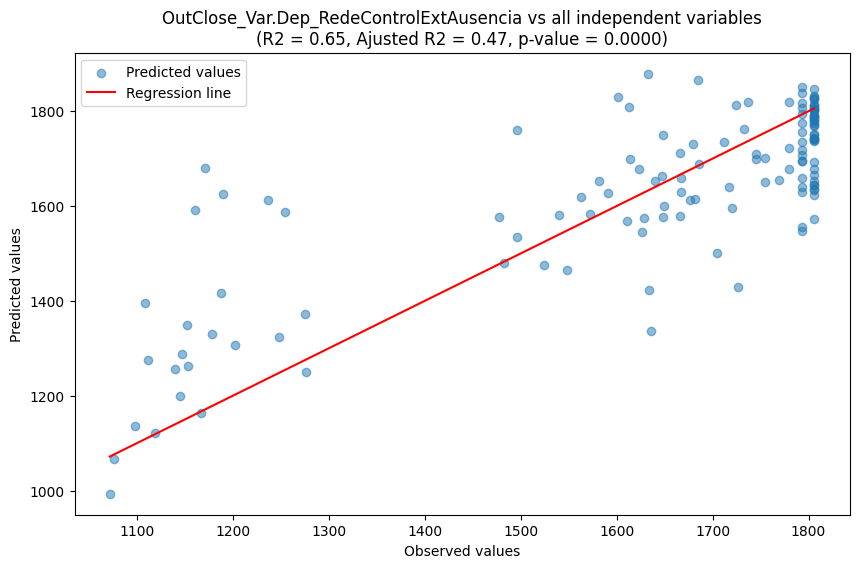

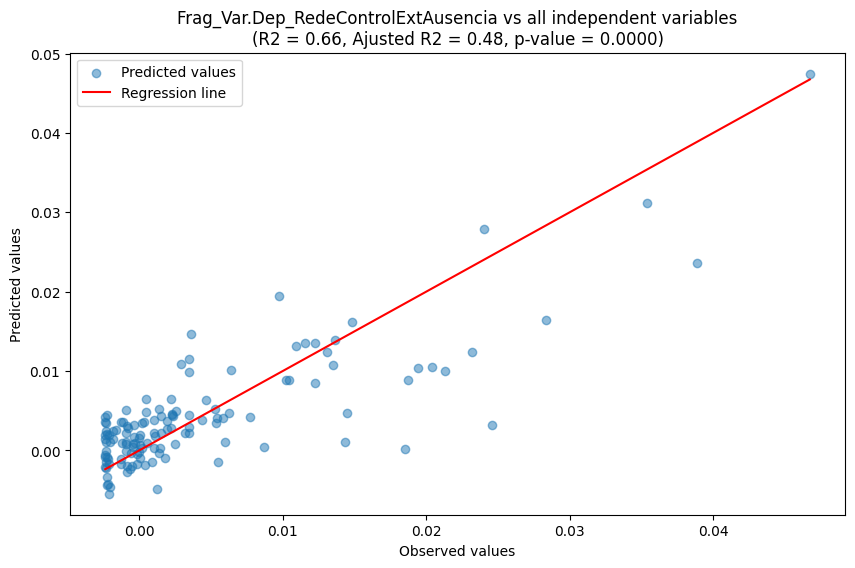

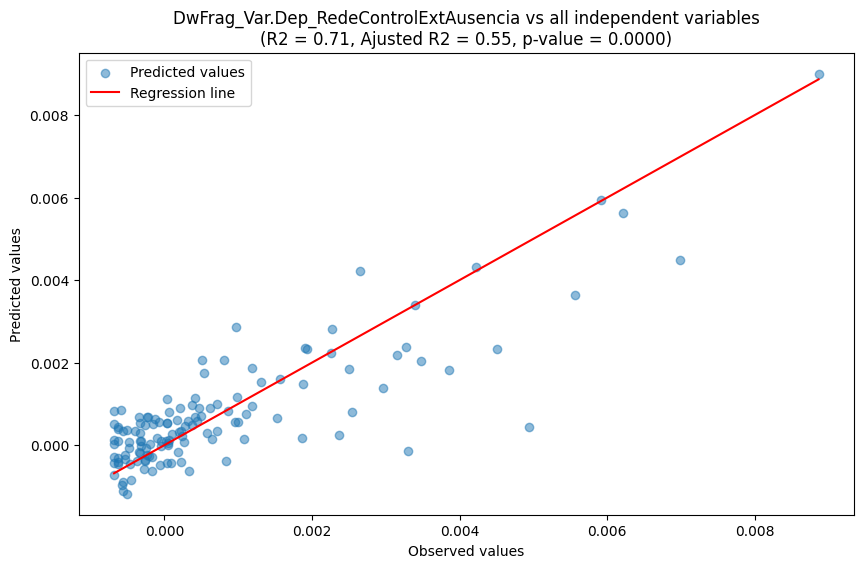

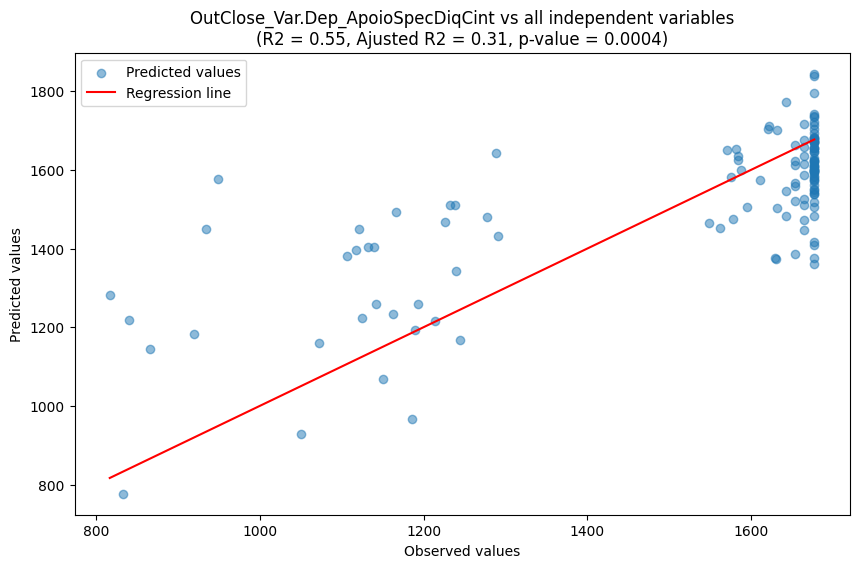

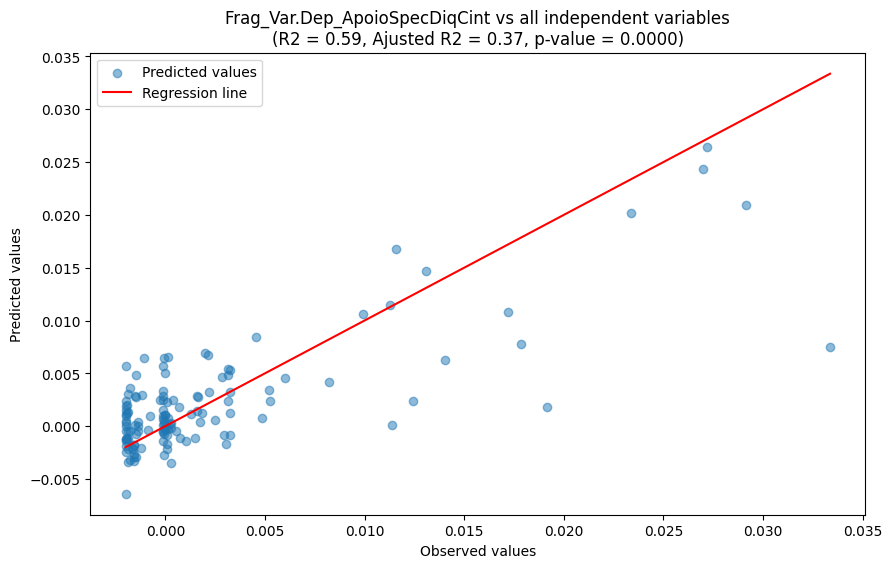

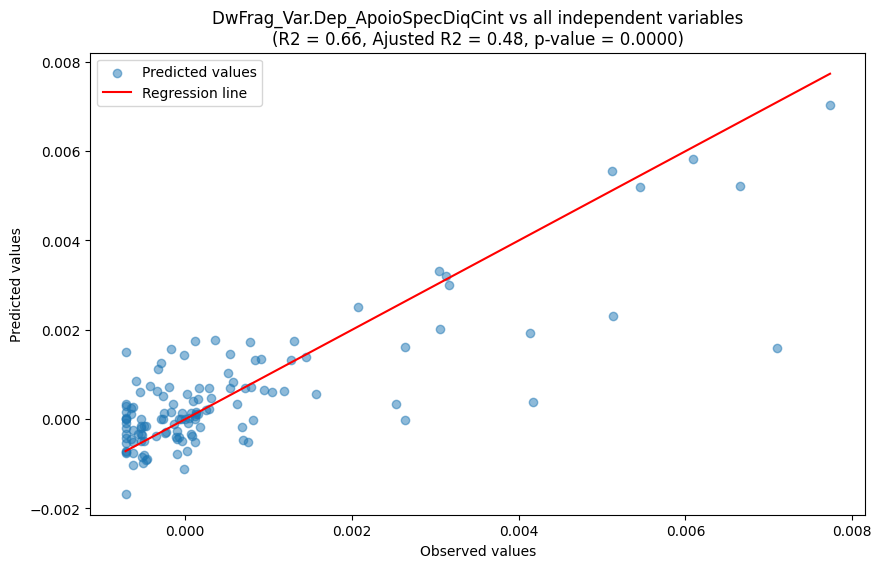

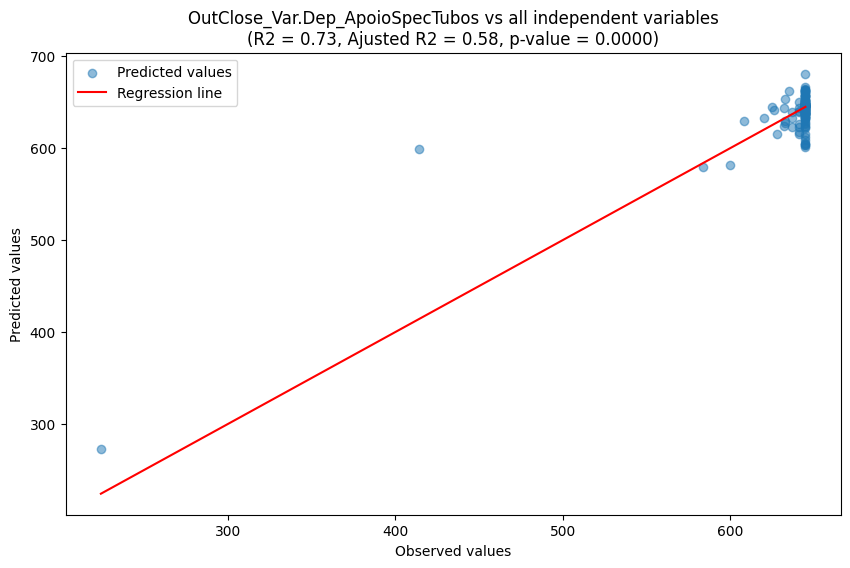

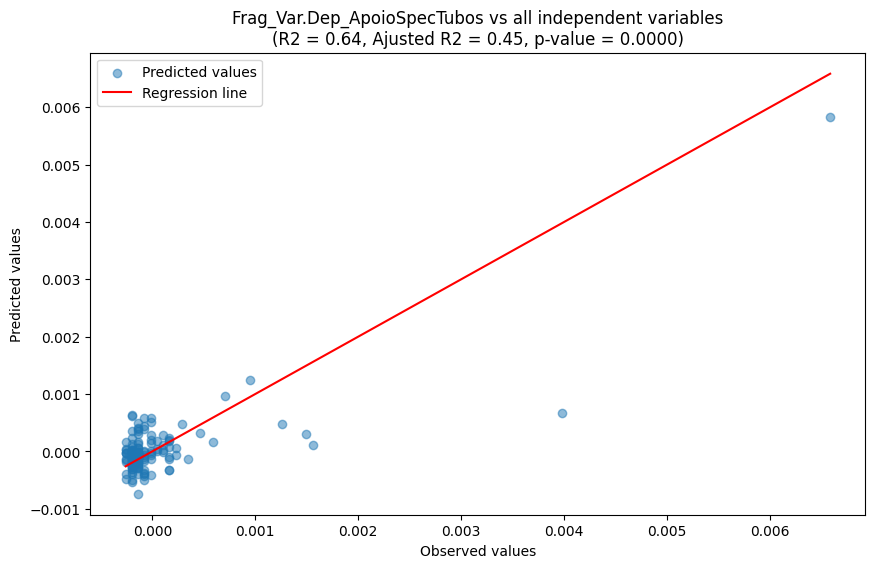

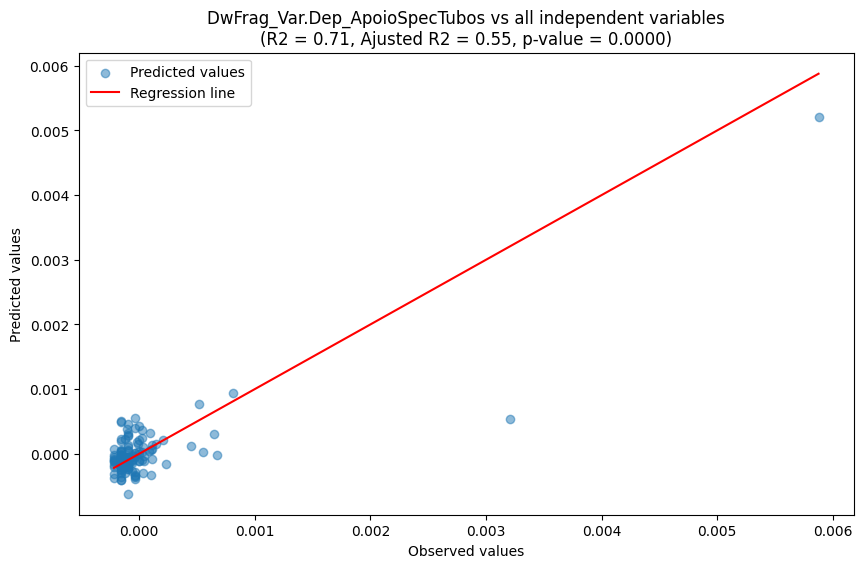

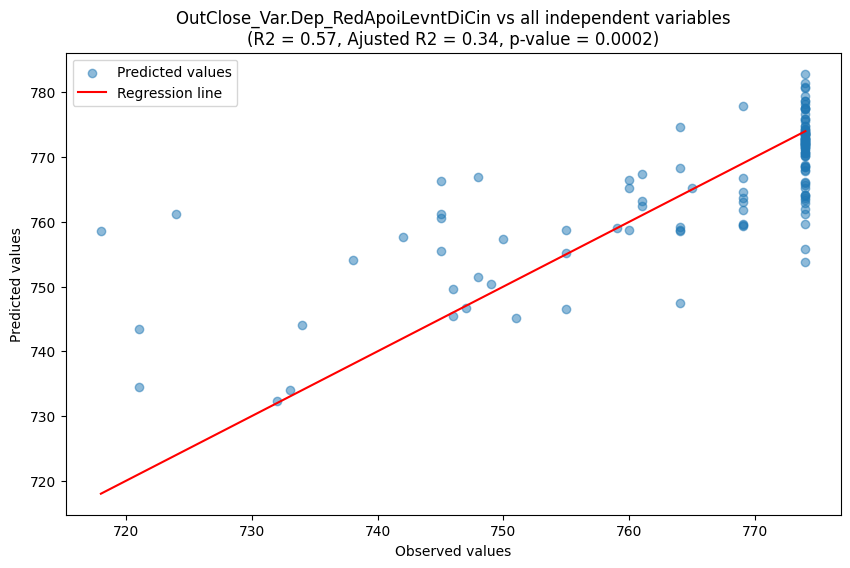

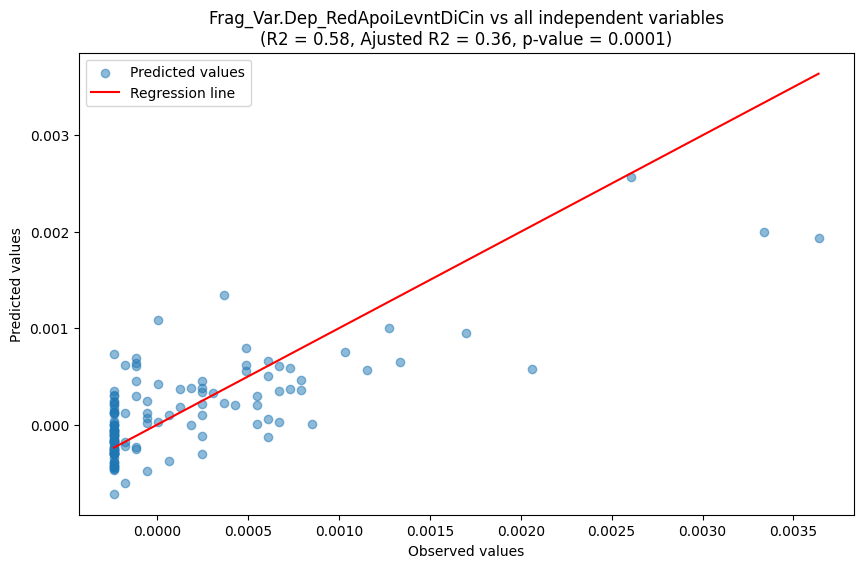

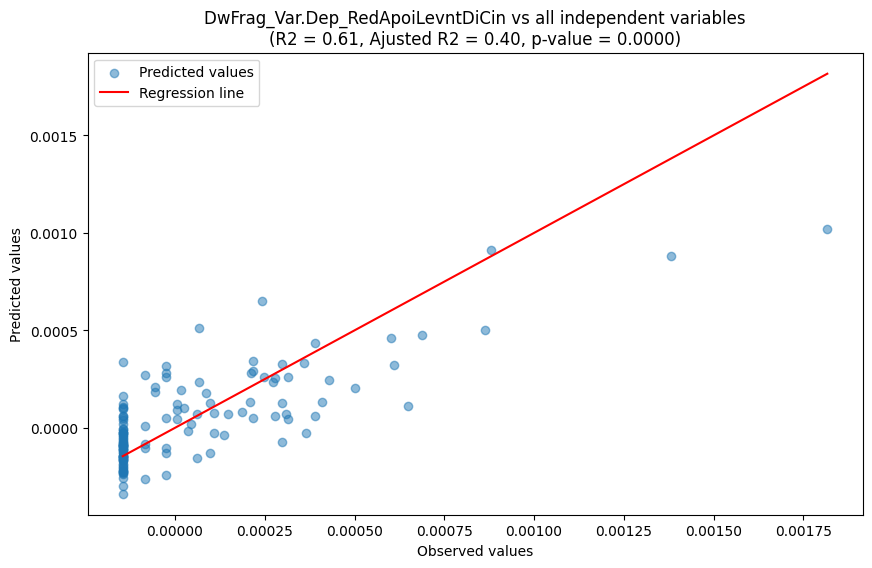

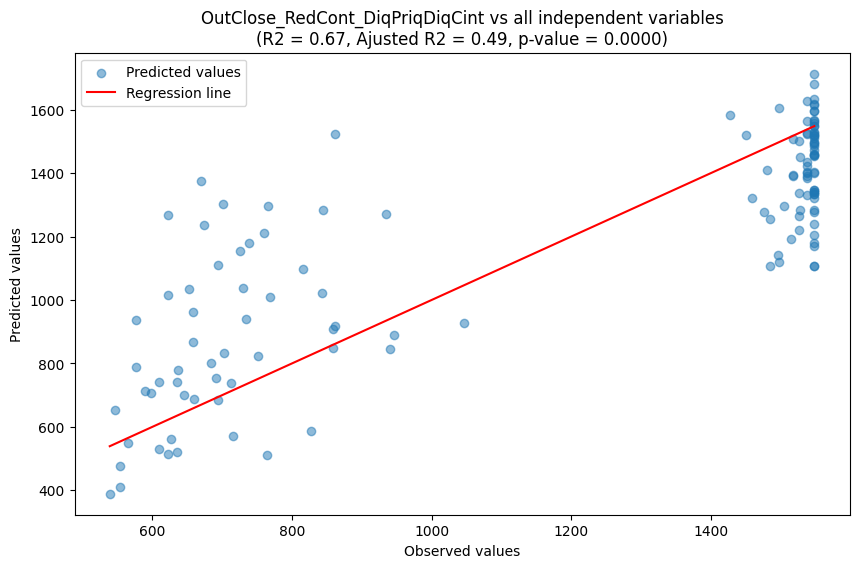

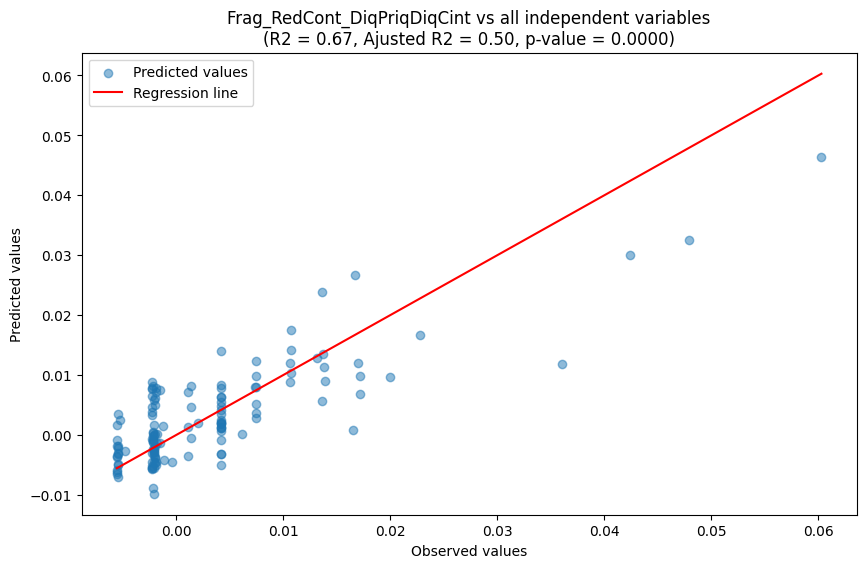

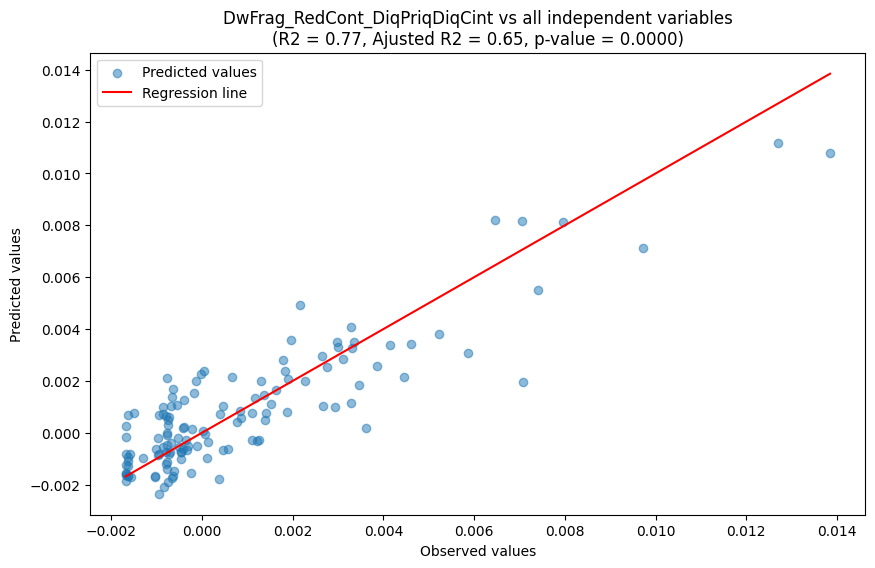

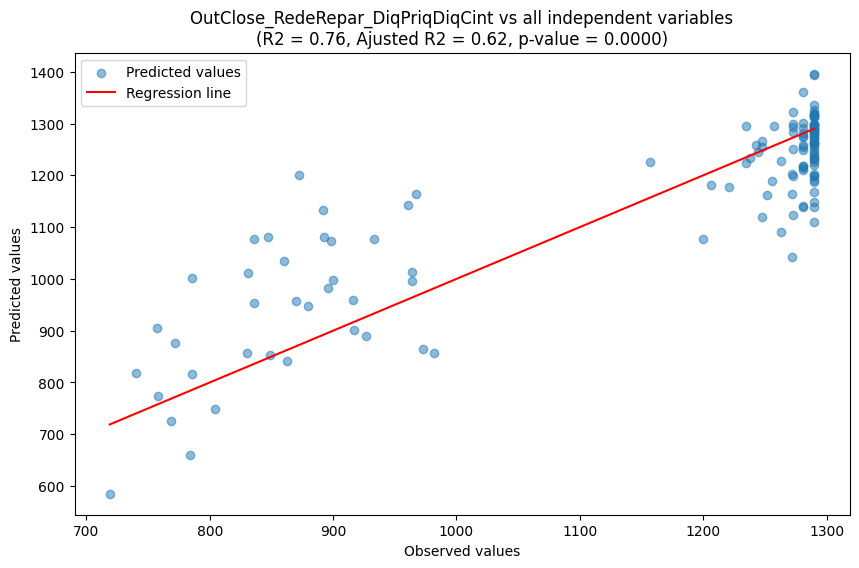

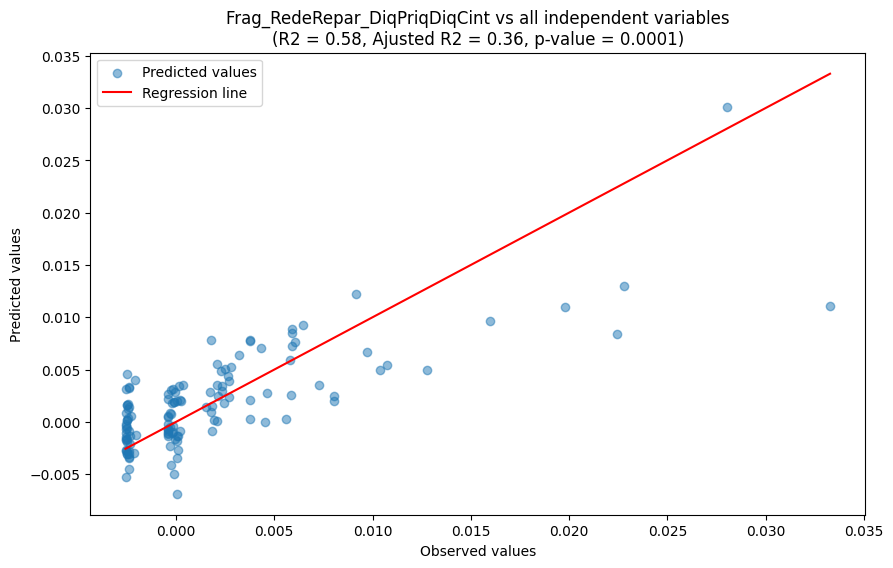

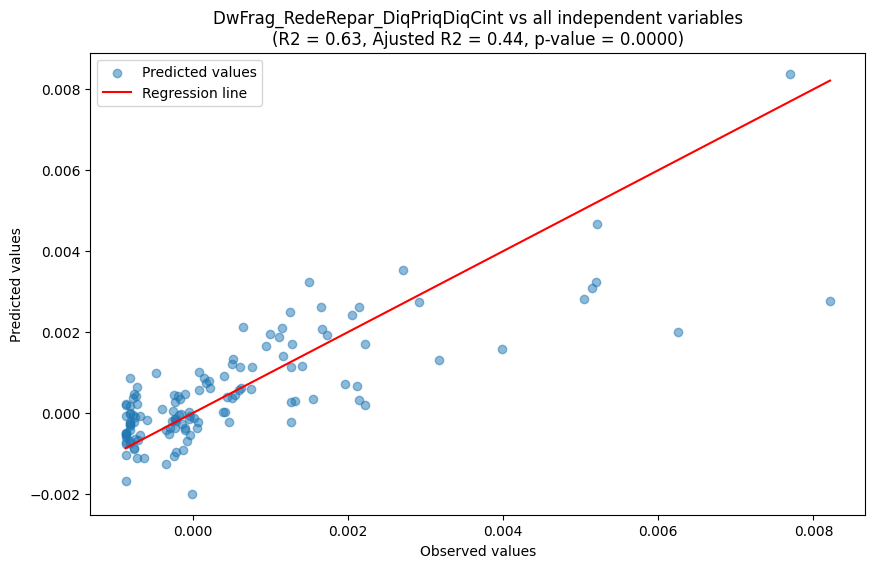

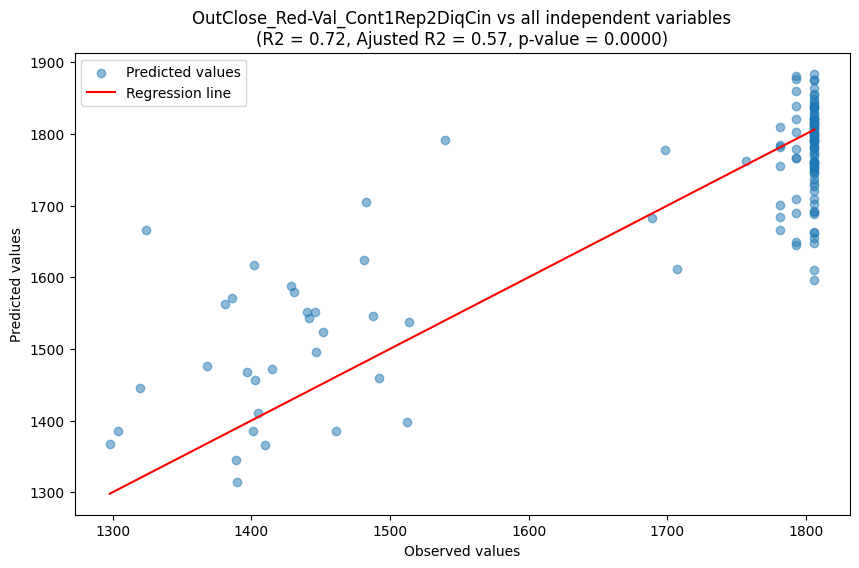

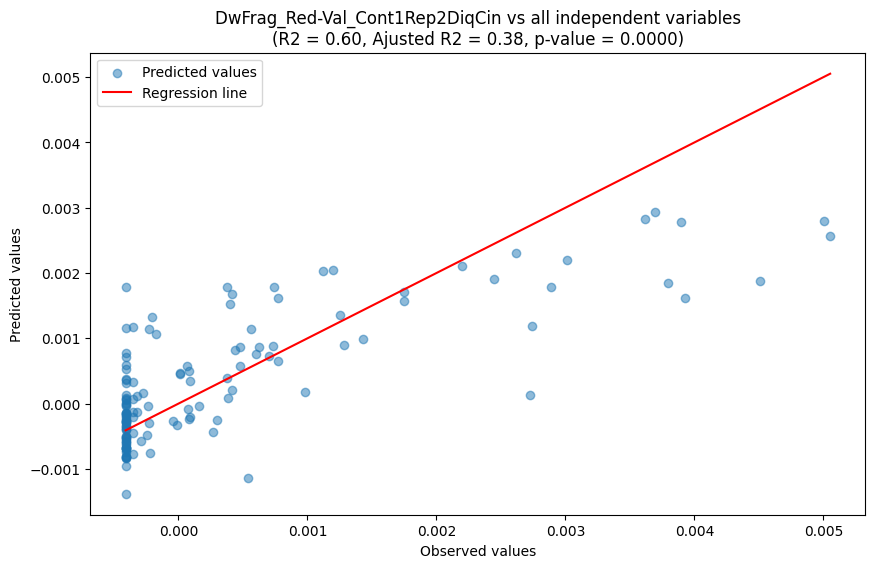

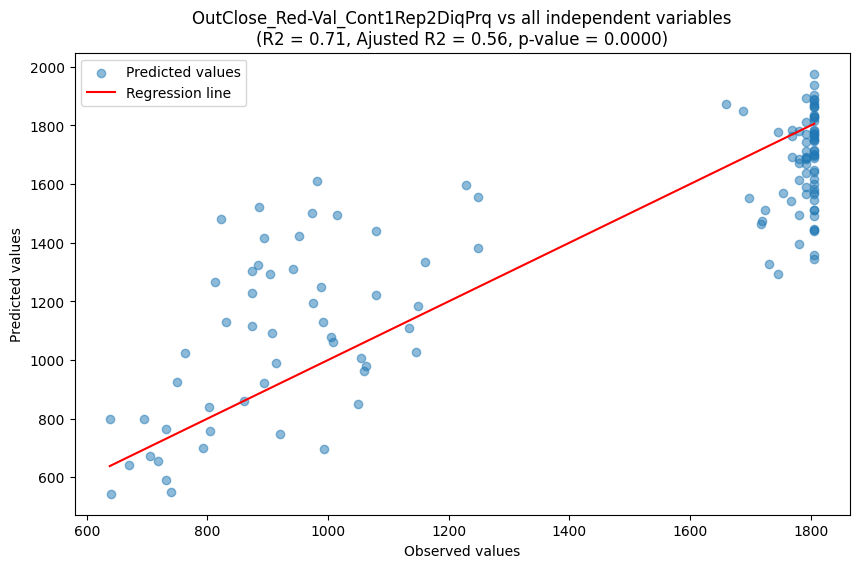

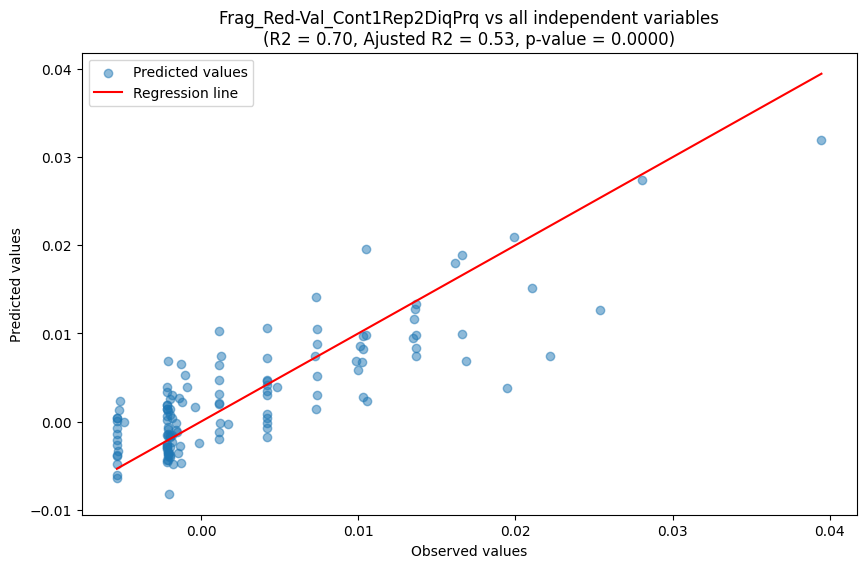

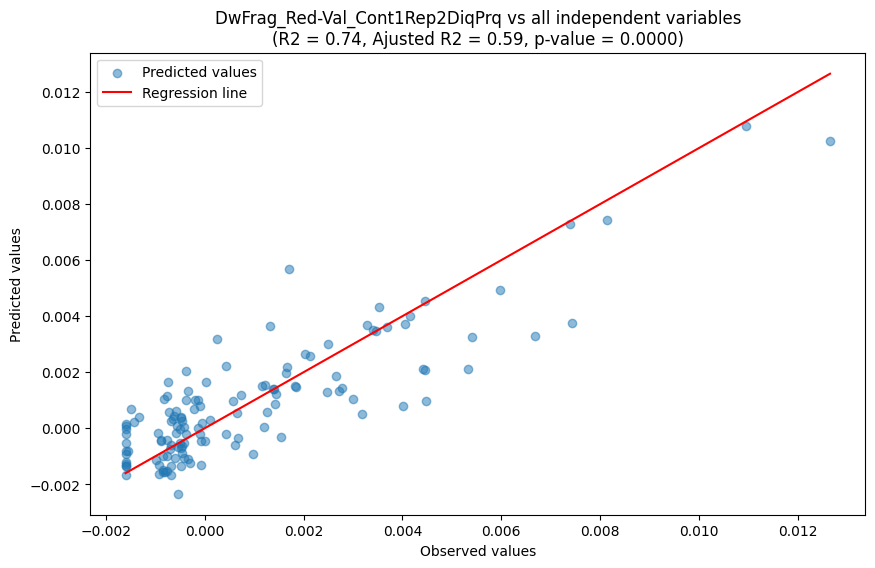

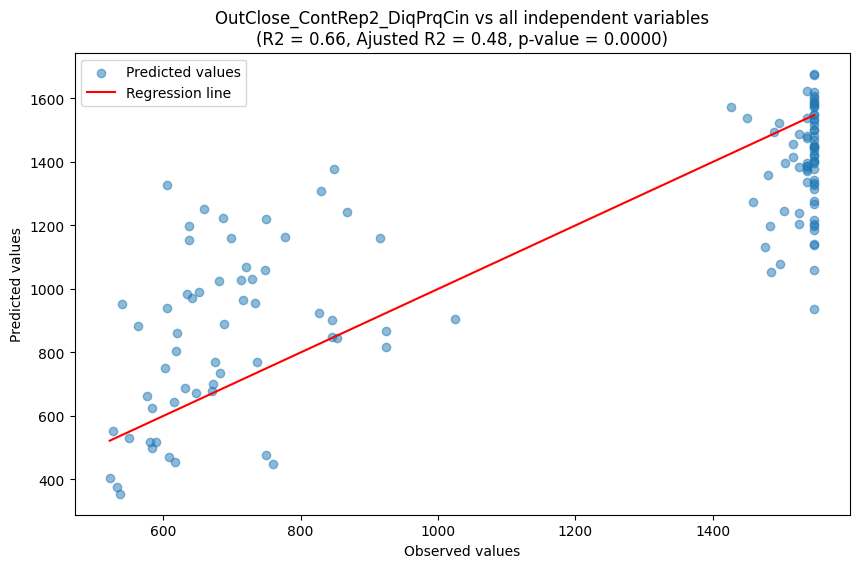

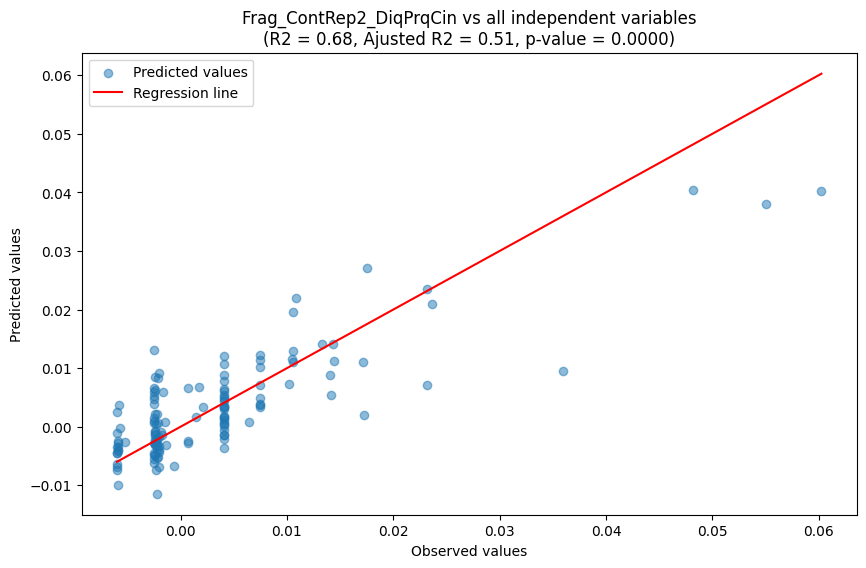

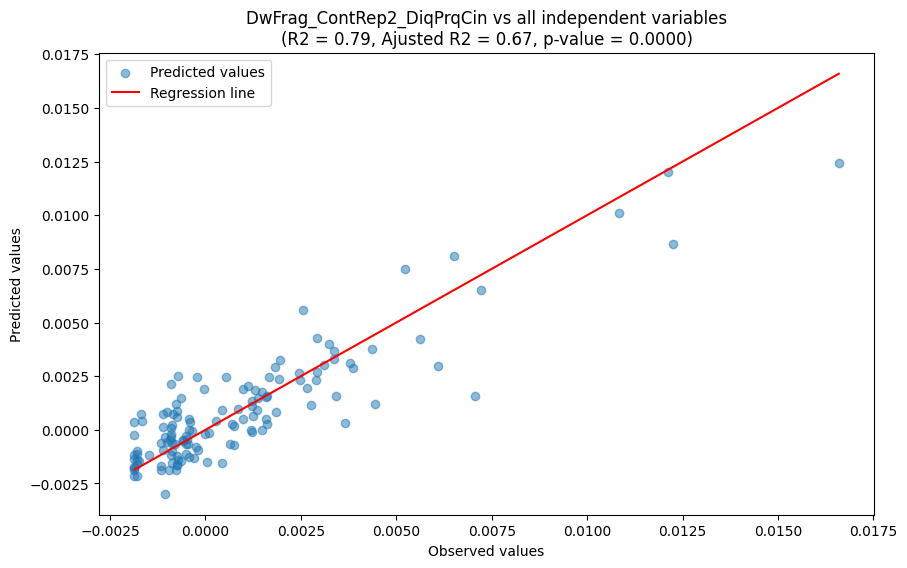

In [4]:
# Eliminar las columnas de ambos dataframes que contienen ceros en alguna fila
filtered_indep_vars = data_frame_combinado_indep.loc[:, (data_frame_combinado_indep != 0).all(axis=0)]
filtered_dep_vars = data_frame_combinado_dep.loc[:, (data_frame_combinado_dep != 0).all(axis=0)]

# Asegurarse de que la columna 'id' esté presente si fue eliminada
if 'id' in data_frame_combinado_indep.columns and 'id' not in filtered_indep_vars.columns:
    filtered_indep_vars['id'] = data_frame_combinado_indep['id']

if 'id' in data_frame_combinado_dep.columns and 'id' not in filtered_dep_vars.columns:
    filtered_dep_vars['id'] = data_frame_combinado_dep['id']

# Seleccionar todas las variables independientes
independent_vars = filtered_indep_vars.drop(columns=['id'])

# Añadir una constante (intercepto) al modelo
X = sm.add_constant(independent_vars)

# Diccionarios para almacenar los resultados
r2_scores = {}
adjusted_r2_scores = {}
p_values = {}

# Iterar sobre cada variable dependiente filtrada
for dependent_var in filtered_dep_vars.columns:
    if dependent_var != 'id':
        y = filtered_dep_vars[dependent_var]
        
        # Realizar la regresión OLS
        model = sm.OLS(y, X).fit()
        
        # Verificar si el R2 ajustado es válido
        if model.rsquared_adj != float('-inf') and not pd.isna(model.rsquared_adj):
            # Almacenar el R2, R2 ajustado y los p-values
            r2_scores[dependent_var] = model.rsquared
            adjusted_r2_scores[dependent_var] = model.rsquared_adj
            p_values[dependent_var] = model.pvalues

# Convertir los diccionarios a dataframes
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Variable Dependiente', 'R2'])
adjusted_r2_df = pd.DataFrame(list(adjusted_r2_scores.items()), columns=['Variable Dependiente', 'R2 Ajustado'])
p_values_df = pd.DataFrame(p_values).transpose()
p_values_df.reset_index(inplace=True)
p_values_df.columns = ['Variable Dependiente'] + list(p_values_df.columns[1:])

# Filtrar las variables con R2 ajustado superior a 0.30
filtered_r2_df = adjusted_r2_df[adjusted_r2_df['R2 Ajustado'] > 0.30]

# Crear un directorio para guardar los gráficos
os.makedirs('../DataIntermediate/regression_plots', exist_ok=True)

# Generar scatter plots para las regresiones con R2 Ajustado > 0.30
for dependent_var in filtered_r2_df['Variable Dependiente']:
    y = filtered_dep_vars[dependent_var]
    model = sm.OLS(y, X).fit()
    y_pred = model.predict(X)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(y, y_pred, alpha=0.5, label='Predicted values')
    
    # Añadir línea de regresión
    min_y = min(y)
    max_y = max(y)
    plt.plot([min_y, max_y], [min_y, max_y], color='red', label='Regression line')  # Línea de regresión
    
    plt.title(f'{dependent_var} vs all independent variables\n(R2 = {model.rsquared:.2f}, Ajusted R2 = {model.rsquared_adj:.2f}, p-value = {model.f_pvalue:.4f})')
    plt.xlabel('Observed values')
    plt.ylabel('Predicted values')
    plt.legend()
    plt.grid(False)
    # plt.savefig(f'../DataIntermediate/regression_plots/regresion_{dependent_var}.png')  # Guardar los plots
    plt.show()

# Crear un nuevo libro de trabajo de Excel
wb = Workbook()

# Hoja para R2
ws_r2 = wb.active
ws_r2.title = "R2"
for idx, row in r2_df.iterrows():
    ws_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_r2.cell(row=idx + 1, column=2, value=row['R2'])

# Hoja para R2 Ajustado
ws_adjusted_r2 = wb.create_sheet(title="R2 Ajustado")
for idx, row in adjusted_r2_df.iterrows():
    ws_adjusted_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_adjusted_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Hoja para p-values
ws_pvalues = wb.create_sheet(title="P-Values")
for idx, row in p_values_df.iterrows():
    for col_idx, value in enumerate(row):
        ws_pvalues.cell(row=idx + 1, column=col_idx + 1, value=value)

# Hoja para las regresiones con R2 Ajustado > 0.30
ws_filtered_r2 = wb.create_sheet(title="Regresiones con R2 > 0.30")
for idx, row in filtered_r2_df.iterrows():
    ws_filtered_r2.cell(row=idx + 1, column=1, value=row['Variable Dependiente'])
    ws_filtered_r2.cell(row=idx + 1, column=2, value=row['R2 Ajustado'])

# Guardar el archivo Excel
wb.save('../DataIntermediate/resultados_regresiones.xlsx')


In [5]:
r2_df.head()

,Variable Dependiente,R2
0,Closeness_Rede_EntreajudaLabur,0.443271
1,Frag_Rede_EntreajudaLabur,0.443271
2,DwFrag_Rede_EntreajudaLabur,0.443271
3,OutClose_Var.Dep_RedeControlExtAusencia,0.653392
4,InClose_Var.Dep_RedeControlExtAusencia,0.403549


In [6]:
# Guardar los dataframes creados que no contienen columnas con valores 0.

filtered_indep_vars.to_csv('../DataIntermediate/indep_var_filtered.csv')
filtered_dep_vars.to_csv('../DataIntermediate/dep_var_filtered.csv')


## Run a RF model for each variable and obtain the importances and interactions between the variables. 

### Here you can run it variable by variable

In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import PartialDependenceDisplay
from openpyxl import Workbook
import os

In [6]:
# Call the rasters filtered before, with no '0' in their columns

indep_variables_no_ceros = pd.read_csv('../DataIntermediate/indep_var_filtered.csv', sep=',')
dep_variables_no_ceros= pd.read_csv('../DataIntermediate/dep_var_filtered.csv', sep=',')

dep_variables_no_ceros.head()

,Unnamed: 0,id,Closeness_Rede_EntreajudaLabur,Frag_Rede_EntreajudaLabur,DwFrag_Rede_EntreajudaLabur,OutClose_Var.Dep_RedeControlExtAusencia,InClose_Var.Dep_RedeControlExtAusencia,Frag_Var.Dep_RedeControlExtAusencia,DwFrag_Var.Dep_RedeControlExtAusencia,OutClose_Var.Dep_ApoioSpecDiqCint,...,Frag_Red-Val_Cont1Rep2DiqPrq,DwFrag_Red-Val_Cont1Rep2DiqPrq,OutClose_ContRep2_DiqPrqCin,InClose_ContRep2_DiqPrqCin,Frag_ContRep2_DiqPrqCin,DwFrag_ContRep2_DiqPrqCin,OutClose_Var.Dep_RedePartilhaAgu,InClose_Var.Dep_RedePartilhaAgu,Frag_Var.Dep_RedePartilhaAgu,DwFrag_Var.Dep_RedePartilhaAgu
0,0,Aiace Quior,251,-0.000401,-0.000401,1806,1614,-0.000927,-0.000351,1654,...,0.001191,0.000005,1526,1176,-0.002359,-0.000908,511,516,0.000050,0.000029
1,1,Alamada Bia,256,-0.001006,-0.001006,1724,1356,0.018513,0.003300,1665,...,-0.001292,-0.000066,1537,1071,-0.002117,-0.000785,516,516,-0.000071,-0.000061
2,2,Alanghate Mfumba,248,-0.000037,-0.000037,1648,1726,0.000890,0.000093,1584,...,-0.005350,-0.001601,1548,1103,-0.002359,-0.000897,516,516,-0.000071,-0.000061
3,3,Albat Calabus,248,-0.000037,-0.000037,1613,1806,-0.000867,-0.000276,1595,...,-0.002140,-0.000457,1489,1119,-0.002056,-0.000758,516,516,-0.000071,-0.000061
4,4,Americano Mbunde,239,0.001053,0.001053,1806,1545,-0.000200,-0.000268,1677,...,-0.002140,-0.000810,1548,1087,-0.002238,-0.000875,516,516,-0.000071,-0.000061


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Definir la variable dependiente y las variables independientes
X = indep_variables_no_ceros.drop(columns=['id', 'Unnamed: 0'])
y = dep_variables_no_ceros['DwFrag_RedCont_DiqPriqDiqCint']

y.head()

0   -0.000781
1   -0.000753
2   -0.000786
3   -0.000726
4   -0.000768
Name: DwFrag_RedCont_DiqPriqDiqCint, dtype: float64

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las variables independientes
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_train = rf.predict(X_train_scaled)
y_pred_test = rf.predict(X_test_scaled)


Mean Squared Error: 0.0000
R^2 Score: 0.1710


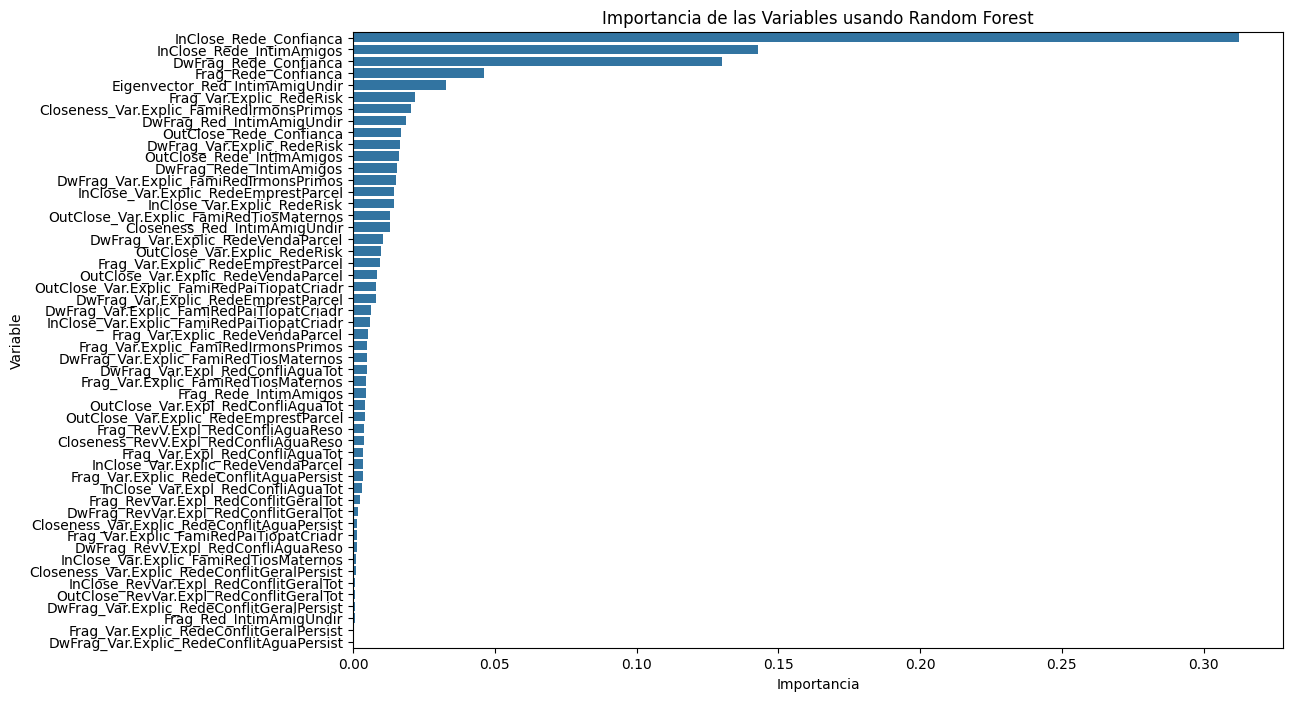

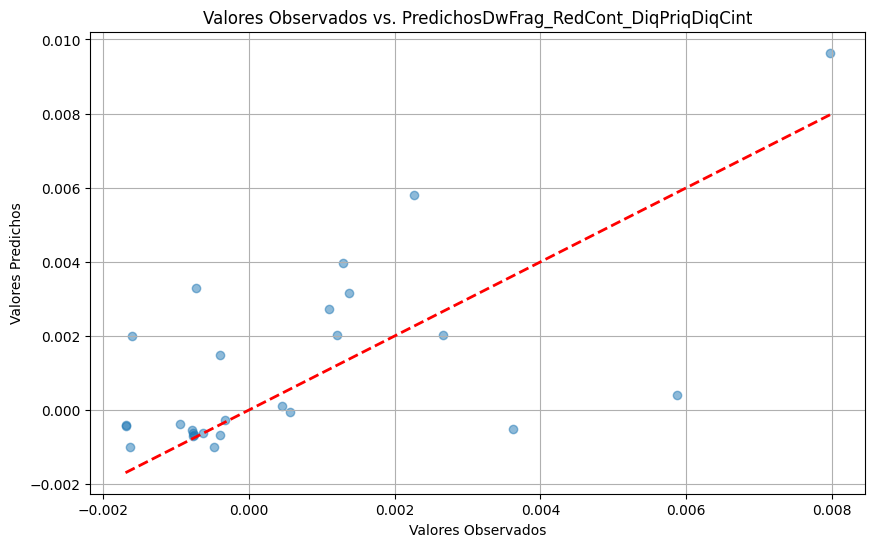

In [9]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
n = len(y_test)
p = X_test_scaled.shape[1]

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Calcular la importancia de las variables
importances = rf.feature_importances_
importance_df = pd.DataFrame({'Variable': X.columns, 'Importancia': importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Crear un gráfico de las importancias de las variables
plt.figure(figsize=(12, 8))
sns.barplot(x='Importancia', y='Variable', data=importance_df)
plt.title('Importancia de las Variables usando Random Forest')
plt.show()

# Crear un gráfico de Valores Observados vs. Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. PredichosDwFrag_RedCont_DiqPriqDiqCint')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()


In [63]:
from sklearn.inspection import partial_dependence

variables = X.columns

# Calcular la importancia y la dirección de las interacciones
interaction_importances = []

for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        pdp = partial_dependence(rf, X_train_scaled, features=[i, j], kind="average")
        pdp_values = pdp['average'][0]
        
        # Calcular la importancia de la interacción
        interaction_importance = np.mean(np.abs(pdp_values - pdp_values.mean()))
        
        # Calcular la dirección de la interacción
        direction = np.mean(np.diff(pdp_values, axis=0))
        
        interaction_importances.append(((variables[i], variables[j]), interaction_importance, direction))

# Ordenar interacciones por importancia
interaction_importances = sorted(interaction_importances, key=lambda x: x[1], reverse=True)
interaction_importance_df = pd.DataFrame(interaction_importances, columns=['Interacción', 'Importancia', 'Dirección'])



In [ ]:
# Mostrar las 10 interacciones más importantes
interaction_importance_df.head(10)

,Interacción,Importancia,Dirección
0,"(OutClose_Var.Explic_FamiRedPaiTiopatCriadr, I...",0.001137,-3.990029e-05
1,"(InClose_Rede_IntimAmigos, InClose_Rede_Confia...",0.001136,-2.123921e-05
2,"(OutClose_Rede_Confianca, InClose_Rede_Confianca)",0.001134,-3.481330e-06
3,"(OutClose_Var.Expl_RedConfliAguaTot, InClose_R...",0.001134,-4.598518e-06
4,"(DwFrag_Var.Explic_FamiRedPaiTiopatCriadr, InC...",0.001133,2.151305e-05
5,"(InClose_Rede_Confianca, DwFrag_Rede_Confianca)",0.001133,-8.271211e-05
6,"(DwFrag_Red_IntimAmigUndir, InClose_Rede_Confi...",0.001133,-9.300538e-07
7,"(DwFrag_Rede_IntimAmigos, InClose_Rede_Confianca)",0.001132,-1.219658e-06
8,"(InClose_Rede_Confianca, Frag_RevVar.Expl_RedC...",0.001127,-8.471735e-05
9,"(InClose_Var.Expl_RedConfliAguaTot, InClose_Re...",0.001127,-8.953078e-06


In [ ]:
# Combinar predicciones de entrenamiento y prueba para todo el conjunto de datos
y_pred_all = np.concatenate([y_pred_train, y_pred_test])
y_all = np.concatenate([y_train, y_test])

In [ ]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_all, y_pred_all)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_all, y_pred_all)
r2 = r2_score(y_all, y_pred_all)
pearson_corr, _ = pearsonr(y_all, y_pred_all)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R^2 Score: {r2:.4f}")
print(f"Pearson Correlation: {pearson_corr:.4f}")


Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0012
Mean Absolute Error (MAE): 0.0007
R^2 Score: 0.8088
Pearson Correlation: 0.9019


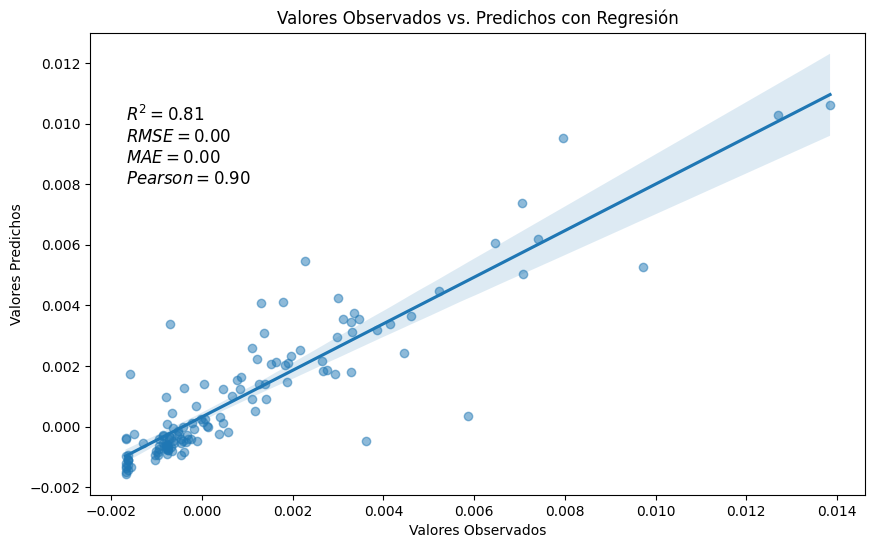

In [ ]:
# Crear un gráfico de Valores Observados vs. Predichos con regresión
plt.figure(figsize=(10, 6))
sns.regplot(x=y_all, y=y_pred_all, scatter_kws={'alpha':0.5})
# plt.plot([min(y_all), max(y_all)], [min(y_all), max(y_all)], color='red', linestyle='--', linewidth=2)
plt.title('Valores Observados vs. Predichos con Regresión')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.text(min(y_all), max(y_pred_all), f'$R^2 = {r2:.2f}$\n$RMSE = {rmse:.2f}$\n$MAE = {mae:.2f}$\n$Pearson = {pearson_corr:.2f}$', fontsize=12, verticalalignment='top')
plt.grid(False)
plt.show()




### Now we will run all in one loop and store the results in one csv file. 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from openpyxl import Workbook

In [10]:
# Call the rasters filtered before, with no '0' in their columns

indep_variables_no_ceros = pd.read_csv('../DataIntermediate/indep_var_filtered.csv', sep=',')
dep_variables_no_ceros= pd.read_csv('../DataIntermediate/dep_var_filtered.csv', sep=',')

dep_variables_no_ceros.head()
# Definir la variable dependiente y las variables independientes
X = indep_variables_no_ceros.drop(columns=['id','Unnamed: 0'])
y = dep_variables_no_ceros.drop(columns=['id','Unnamed: 0'])


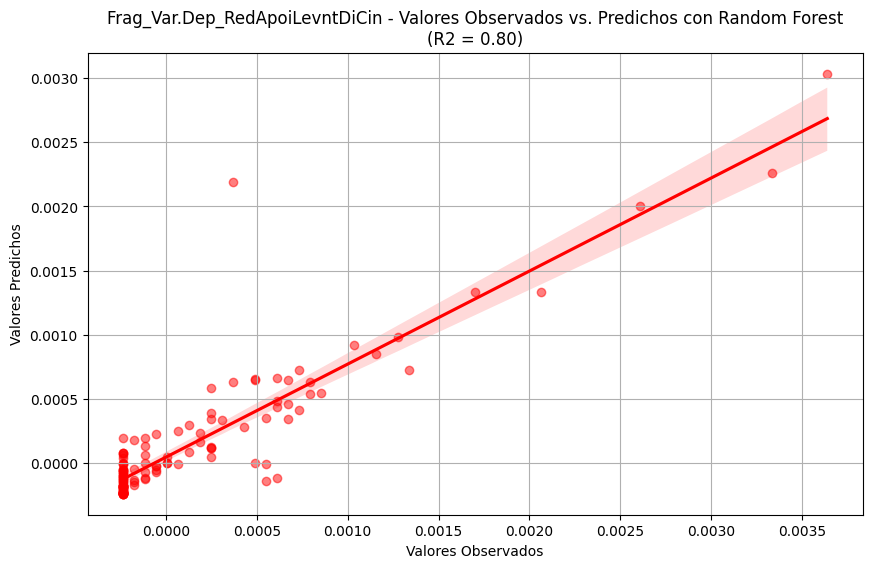

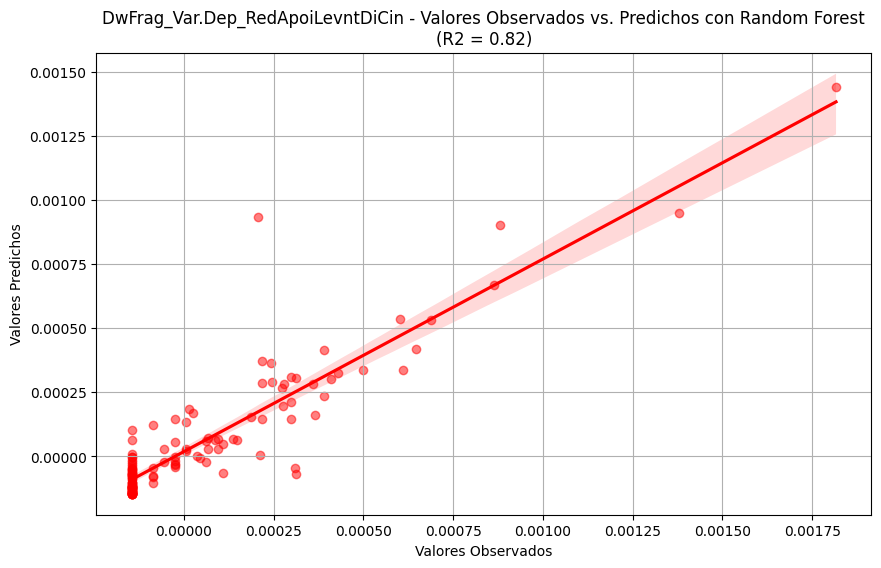

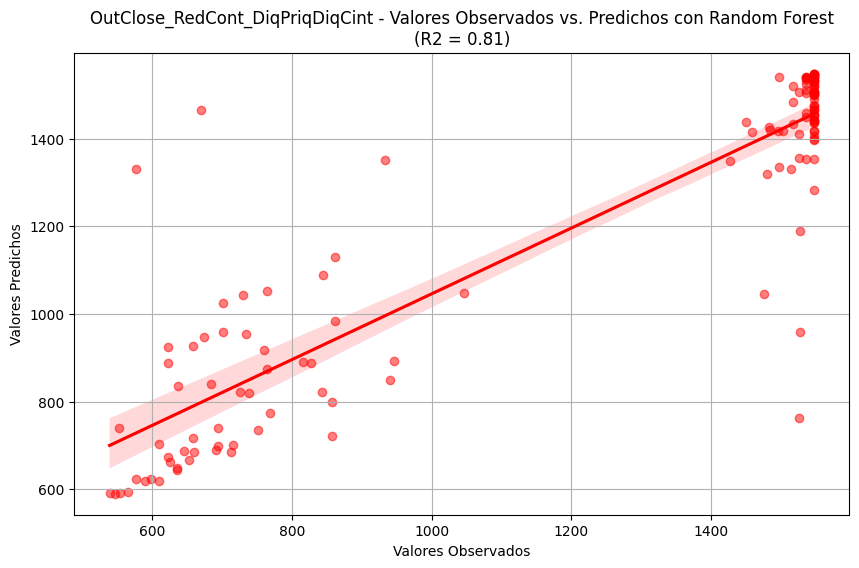

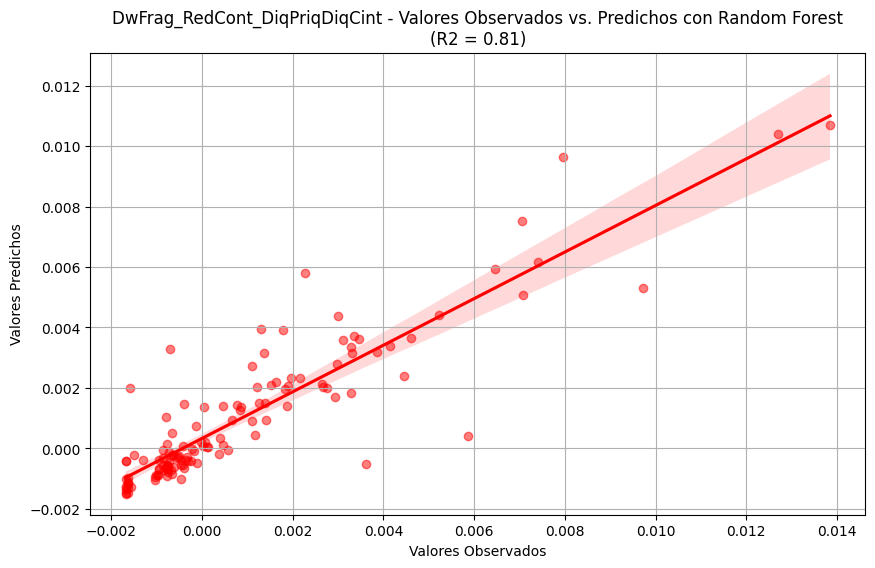

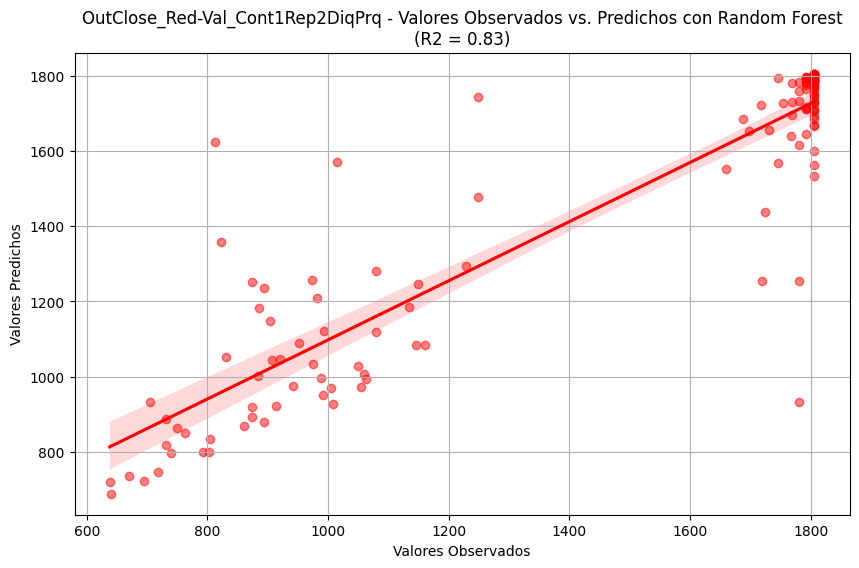

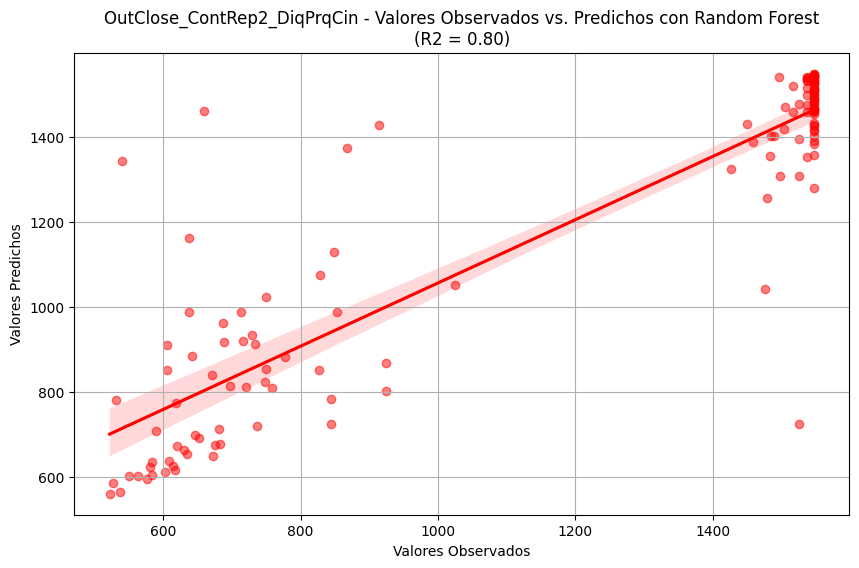

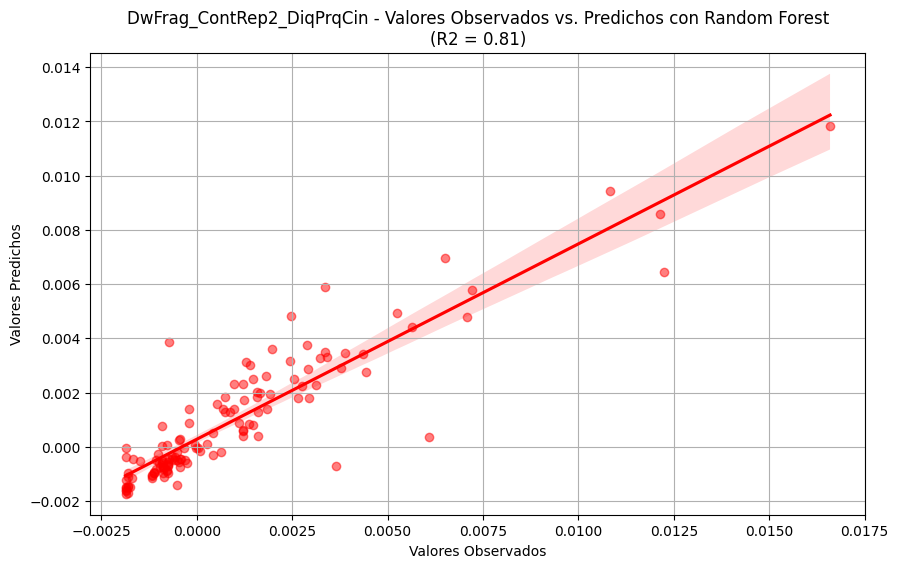

In [16]:
# Diccionarios para almacenar los resultados
results_test = []
results_all = []
selected_variables = []

# Iterar sobre cada variable dependiente
for col in y.columns:
    # Seleccionar la variable dependiente específica
    y_col = y[col]
    
    # Dividir los datos en entrenamiento (80%) y prueba (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y_col, test_size=0.2, random_state=42)
    
    # Escalar las variables independientes para el entrenamiento y prueba
    scaler_train = StandardScaler()
    X_train_scaled = scaler_train.fit_transform(X_train)
    X_test_scaled = scaler_train.transform(X_test)
    
    # Crear el modelo de Random Forest y entrenarlo con los datos de entrenamiento
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Realizar predicciones con los datos de prueba
    y_pred_test = rf.predict(X_test_scaled)
    
    # Calcular métricas de rendimiento con los datos de prueba
    r2_test = r2_score(y_test, y_pred_test)
    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    # Guardar resultados para los datos de prueba
    results_test.append({
        'Variable Dependiente': col,
        'R2 Test Data': r2_test,
        'RMSE Test Data': rmse_test,
        'MAE Test Data': mae_test
    })
    
    # Realizar predicciones con todos los datos (entrenamiento + prueba)
    X_scaled = scaler_train.transform(X)  # Escalar todas las variables independientes
    y_pred_all = rf.predict(X_scaled)
    
    # Calcular métricas de rendimiento con todos los datos
    r2_all = r2_score(y_col, y_pred_all)
    mse_all = mean_squared_error(y_col, y_pred_all)
    rmse_all = np.sqrt(mse_all)
    mae_all = mean_absolute_error(y_col, y_pred_all)
    
    # Guardar resultados para todos los datos
    results_all.append({
        'Variable Dependiente': col,
        'R2 All Data': r2_all,
        'RMSE All Data': rmse_all,
        'MAE All Data': mae_all
    })
    
    # Si el R2 con todos los datos es mayor a 0.50, guardar el nombre de la variable
    if r2_all > 0.80:
        selected_variables.append(col)
        
        # Crear gráfico de valores observados vs predichos usando sns.regplot
        plt.figure(figsize=(10, 6))
        sns.regplot(x=y_col, y=y_pred_all, scatter_kws={'alpha':0.5}, color='red')
        plt.title(f'{col} - Valores Observados vs. Predichos con Random Forest\n(R2 = {r2_all:.2f})')
        plt.xlabel('Valores Observados')
        plt.ylabel('Valores Predichos')
        plt.grid(False)
        plt.show()

In [17]:
# Convertir los resultados a DataFrames
results_test_df = pd.DataFrame(results_test)
results_all_df = pd.DataFrame(results_all)

# Guardar los resultados en archivos Excel
wb = Workbook()

# Hoja para resultados con datos de prueba
ws_test = wb.active
ws_test.title = "Random Forest Results Test Data"
ws_test.append(['Variable Dependiente', 'R2 Test Data', 'RMSE Test Data', 'MAE Test Data'])
for row in results_test:
    ws_test.append([row['Variable Dependiente'], row['R2 Test Data'], row['RMSE Test Data'], row['MAE Test Data']])

# Hoja para resultados con todos los datos
ws_all = wb.create_sheet(title="Random Forest Results All Data")
ws_all.append(['Variable Dependiente', 'R2 All Data', 'RMSE All Data', 'MAE All Data'])
for row in results_all:
    ws_all.append([row['Variable Dependiente'], row['R2 All Data'], row['RMSE All Data'], row['MAE All Data']])

# Guardar el archivo Excel
wb.save('../Results/random_forest_results.xlsx')
